In [16]:
import torch

In [17]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [18]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
 
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [19]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [65]:
xx_train = np.concatenate( (x_train, x_train*x_train), axis = 1)
xx_train = torch.from_numpy(xx_train)

torch.Size([1, 15])

In [27]:
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable

In [28]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1) # x is 1 dim, y is 1 dim
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
model = LinearRegression()


In [91]:
# polynomial regression
class PolynomialRegression(nn.Module):
    def __init__(self):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(2, 1) # input 2 dim, output 1 dim
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
    
model_pln = PolynomialRegression()



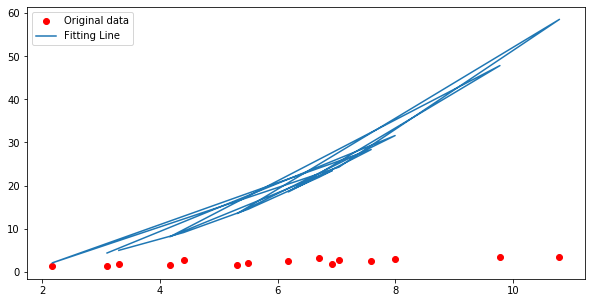

In [92]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)

num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(xx_train)
    target = Variable(y_train)
    
    #forward
    out = model_pln(inputs)
    loss = criterion(out, target)
    
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        #print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')
        pass
    
model.eval() # testing mode; for dropout and batch normalization
predict = model_pln(Variable(xx_train))
predict = predict.data.numpy()



with torch.no_grad():
    predict = model_pln(xx_train)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()



In [79]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)

In [23]:
# train

In [80]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)
    
    #forward
    out = model(inputs)
    loss = criterion(out, target)
    
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

Epoch[20/1000], loss: 0.175657
Epoch[40/1000], loss: 0.175650
Epoch[60/1000], loss: 0.175643
Epoch[80/1000], loss: 0.175636
Epoch[100/1000], loss: 0.175629
Epoch[120/1000], loss: 0.175622
Epoch[140/1000], loss: 0.175615
Epoch[160/1000], loss: 0.175609
Epoch[180/1000], loss: 0.175602
Epoch[200/1000], loss: 0.175595
Epoch[220/1000], loss: 0.175588
Epoch[240/1000], loss: 0.175581
Epoch[260/1000], loss: 0.175574
Epoch[280/1000], loss: 0.175568
Epoch[300/1000], loss: 0.175561
Epoch[320/1000], loss: 0.175554
Epoch[340/1000], loss: 0.175547
Epoch[360/1000], loss: 0.175540
Epoch[380/1000], loss: 0.175533
Epoch[400/1000], loss: 0.175527
Epoch[420/1000], loss: 0.175520
Epoch[440/1000], loss: 0.175513
Epoch[460/1000], loss: 0.175506
Epoch[480/1000], loss: 0.175499
Epoch[500/1000], loss: 0.175493
Epoch[520/1000], loss: 0.175486
Epoch[540/1000], loss: 0.175479
Epoch[560/1000], loss: 0.175472
Epoch[580/1000], loss: 0.175466
Epoch[600/1000], loss: 0.175459
Epoch[620/1000], loss: 0.175452
Epoch[640/10

In [34]:
# validation

In [35]:
model.eval() # testing mode; for dropout and batch normalization
predict = model(Variable(x_train))
predict = predict.data.numpy()

In [37]:
import matplotlib.pyplot as plt

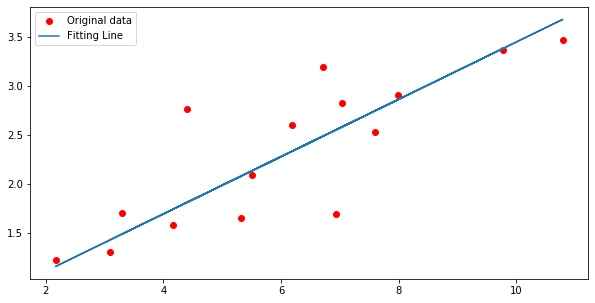

In [38]:
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

# 保存模型
torch.save(model.state_dict(), './linear.pth')